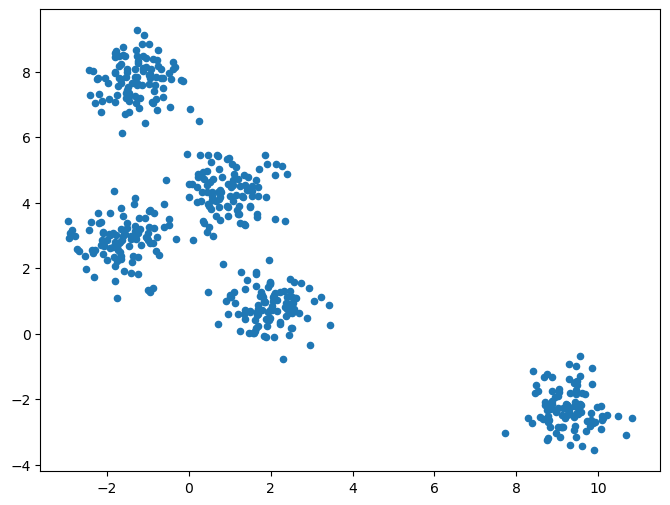

In [42]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2025)
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], s= 20)    

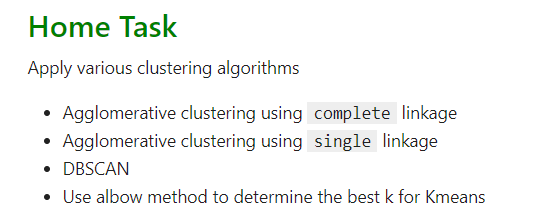

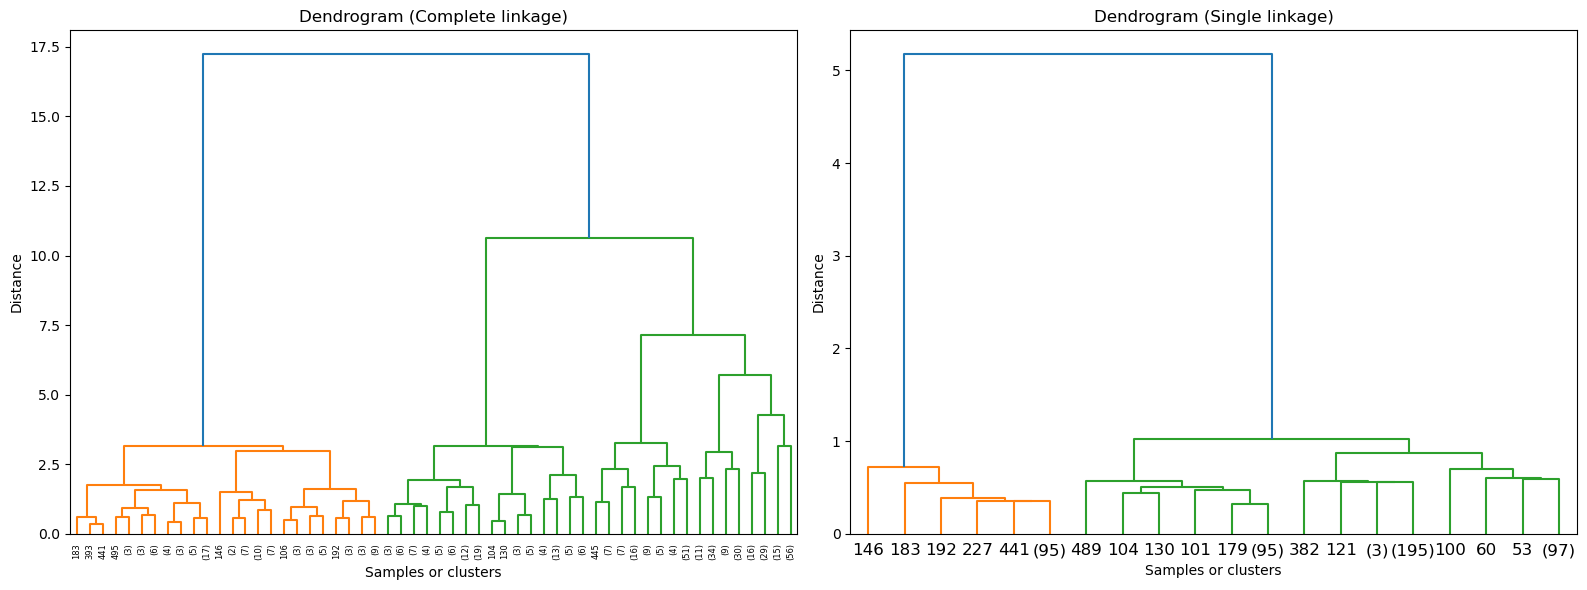

In [43]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

Z_complete = linkage(X, method='complete')  
Z_single = linkage(X, method='single')      
 
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
dendrogram(Z_complete, truncate_mode='level', p=5)
plt.title('Dendrogram (Complete linkage)')
plt.xlabel('Samples or clusters')
plt.ylabel('Distance')

plt.subplot(1, 2, 2)
dendrogram(Z_single, truncate_mode='level', p=5)
plt.title('Dendrogram (Single linkage)')
plt.xlabel('Samples or clusters')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


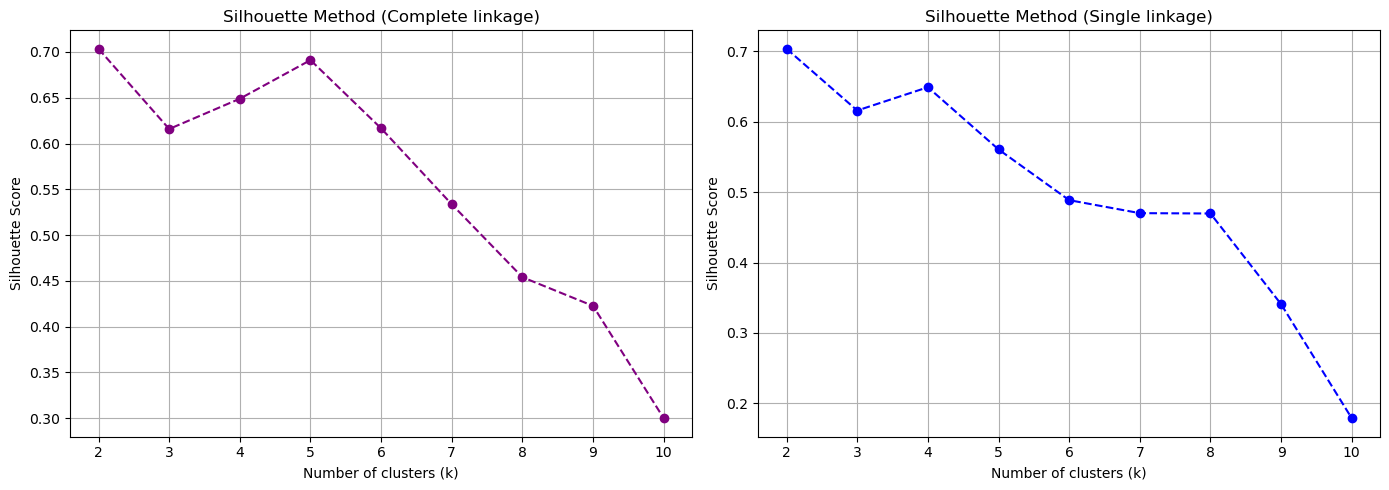

In [ ]:
from sklearn.metrics import silhouette_score

Z_complete = linkage(X, method='complete')
Z_single = linkage(X, method='single')

range_n_clusters = range(2, 11)

silhouette_complete = []
silhouette_single = []

for k in range_n_clusters:
    labels_c = fcluster(Z_complete, k, criterion='maxclust')
    labels_s = fcluster(Z_single, k, criterion='maxclust')
    
    silhouette_complete.append(silhouette_score(X, labels_c))
    silhouette_single.append(silhouette_score(X, labels_s))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(range_n_clusters, silhouette_complete, 'o--', color='purple')
axs[0].set_title('Silhouette Method (Complete linkage)')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Silhouette Score')
axs[0].grid(True)
axs[0].set_xticks(range_n_clusters)

axs[1].plot(range_n_clusters, silhouette_single, 'o--', color='blue')
axs[1].set_title('Silhouette Method (Single linkage)')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('Silhouette Score')
axs[1].grid(True)
axs[1].set_xticks(range_n_clusters)

plt.tight_layout()
plt.show()


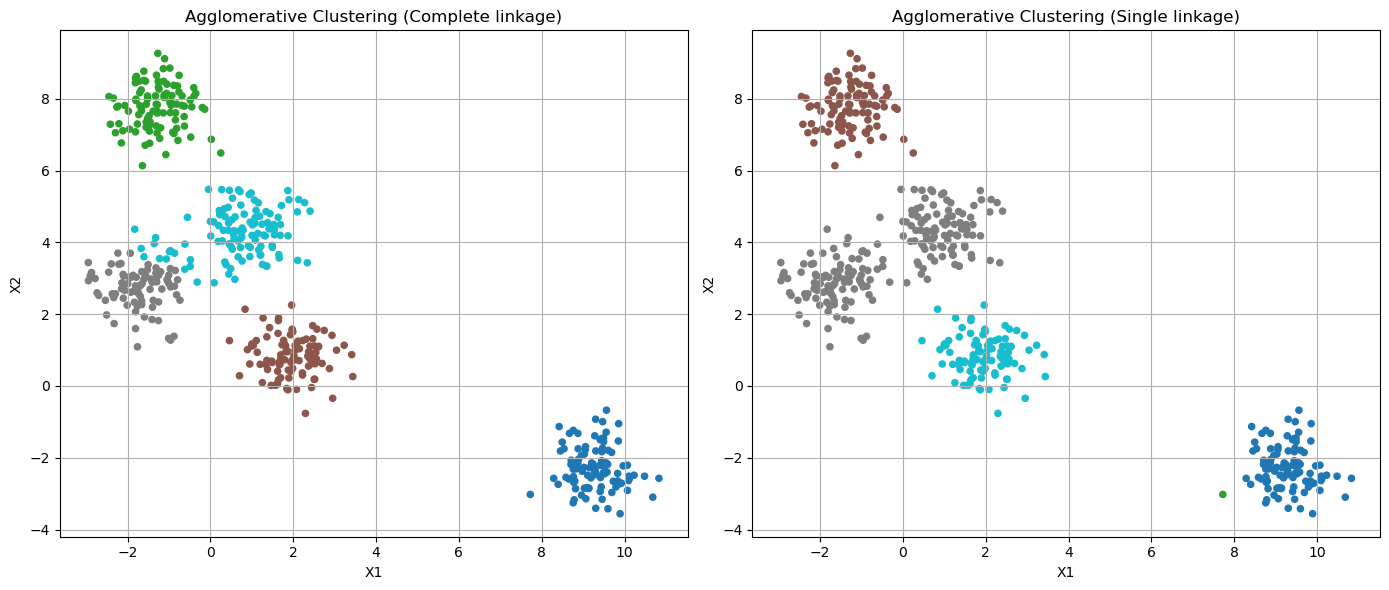

In [45]:
labels_complete = fcluster(Z_complete, t=5, criterion='maxclust')
labels_single = fcluster(Z_single, t=5, criterion='maxclust')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_complete, cmap='tab10', s=20)
plt.title('Agglomerative Clustering (Complete linkage)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_single, cmap='tab10', s=20)
plt.title('Agglomerative Clustering (Single linkage)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)

plt.tight_layout()
plt.show()

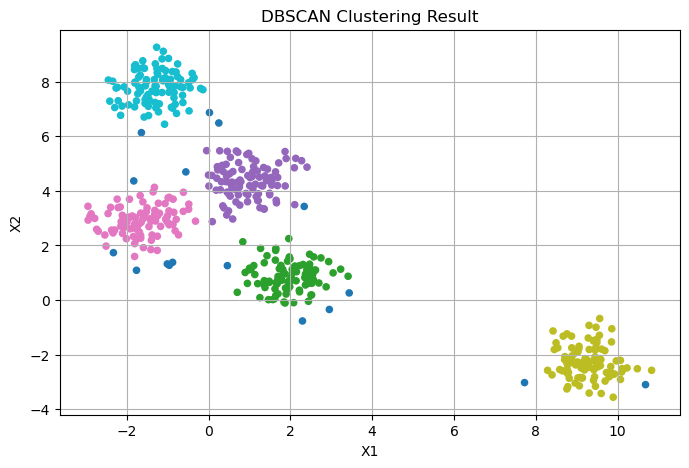

In [60]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)
dbs_labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=dbs_labels, cmap='tab10', s=20)
plt.title('DBSCAN Clustering Result')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

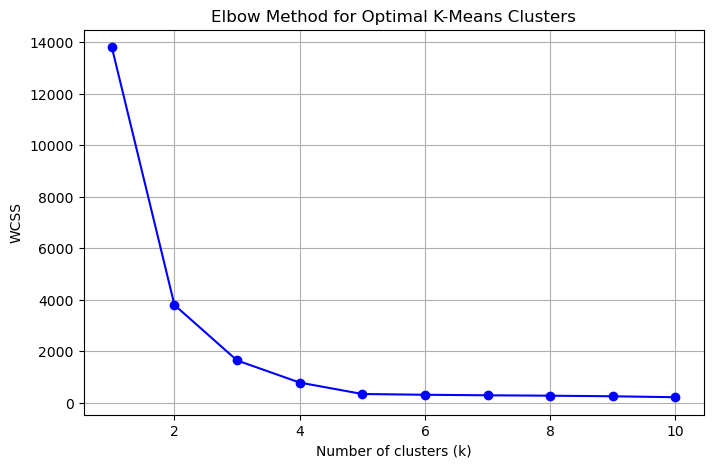

In [70]:
from sklearn.cluster import KMeans

k_range_elbow = range(1, 11)


def compute_wcss(X):
    wcss = []
    for k in k_range_elbow:
        kmeans = KMeans(n_clusters=k, init='k-means++')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss


wcss = compute_wcss(X)

plt.figure(figsize=(8, 5))
plt.plot(k_range_elbow, wcss, 'bo-')
plt.title('Elbow Method for Optimal K-Means Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

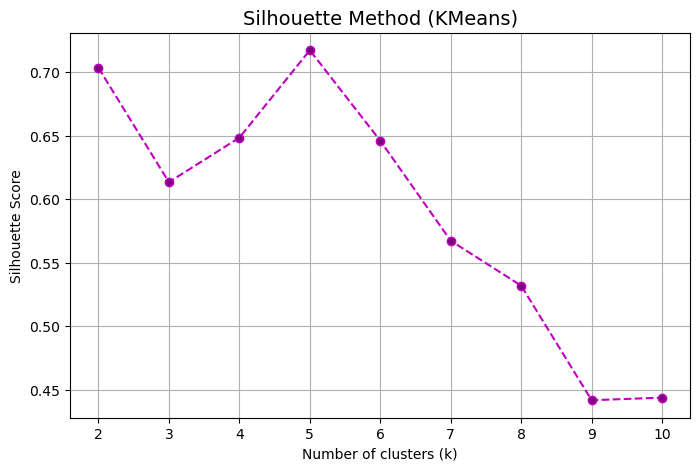

In [ ]:
from sklearn.metrics import silhouette_score

k_range_silhouette = range(2, 11)
silhouette_scores = []

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range_silhouette, silhouette_scores, 'm--o', markerfacecolor='purple')
plt.title('Silhouette Method (KMeans)', fontsize=14)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


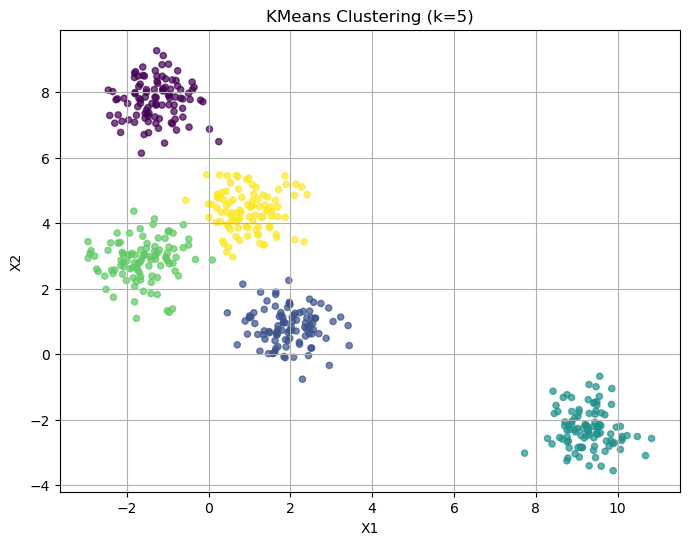

In [82]:
kmeans = KMeans(n_clusters=5, init='k-means++')
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=20, alpha=0.7)
plt.title('KMeans Clustering (k=5)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()